In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/Tombo_all_avg.csv')
dataset

,indx,kmer,avg_mean,avg_std,avg_mdintense,avg_length2,label
0,20,CATCT,-0.379295,0.059457,-0.386073,18.6,1
1,22,TCTTC,-0.224518,0.079366,-0.226347,21.8,1
2,23,CTTCG,-0.027033,0.106017,-0.016552,24.2,1
3,35,CGTGG,0.135500,0.146305,0.127863,19.6,1
4,44,CCTGC,-0.297275,0.098792,-0.307865,59.0,1
...,...,...,...,...,...,...,...
1822819,350,GCTGG,0.251371,0.097341,0.250863,205.6,0
1822820,365,GATCC,-0.242580,0.199999,-0.230983,8.0,0
1822821,374,GATCC,-0.153419,0.253634,-0.074312,570.2,0
1822822,377,CCTGA,-0.008397,0.117552,-0.003787,137.6,0


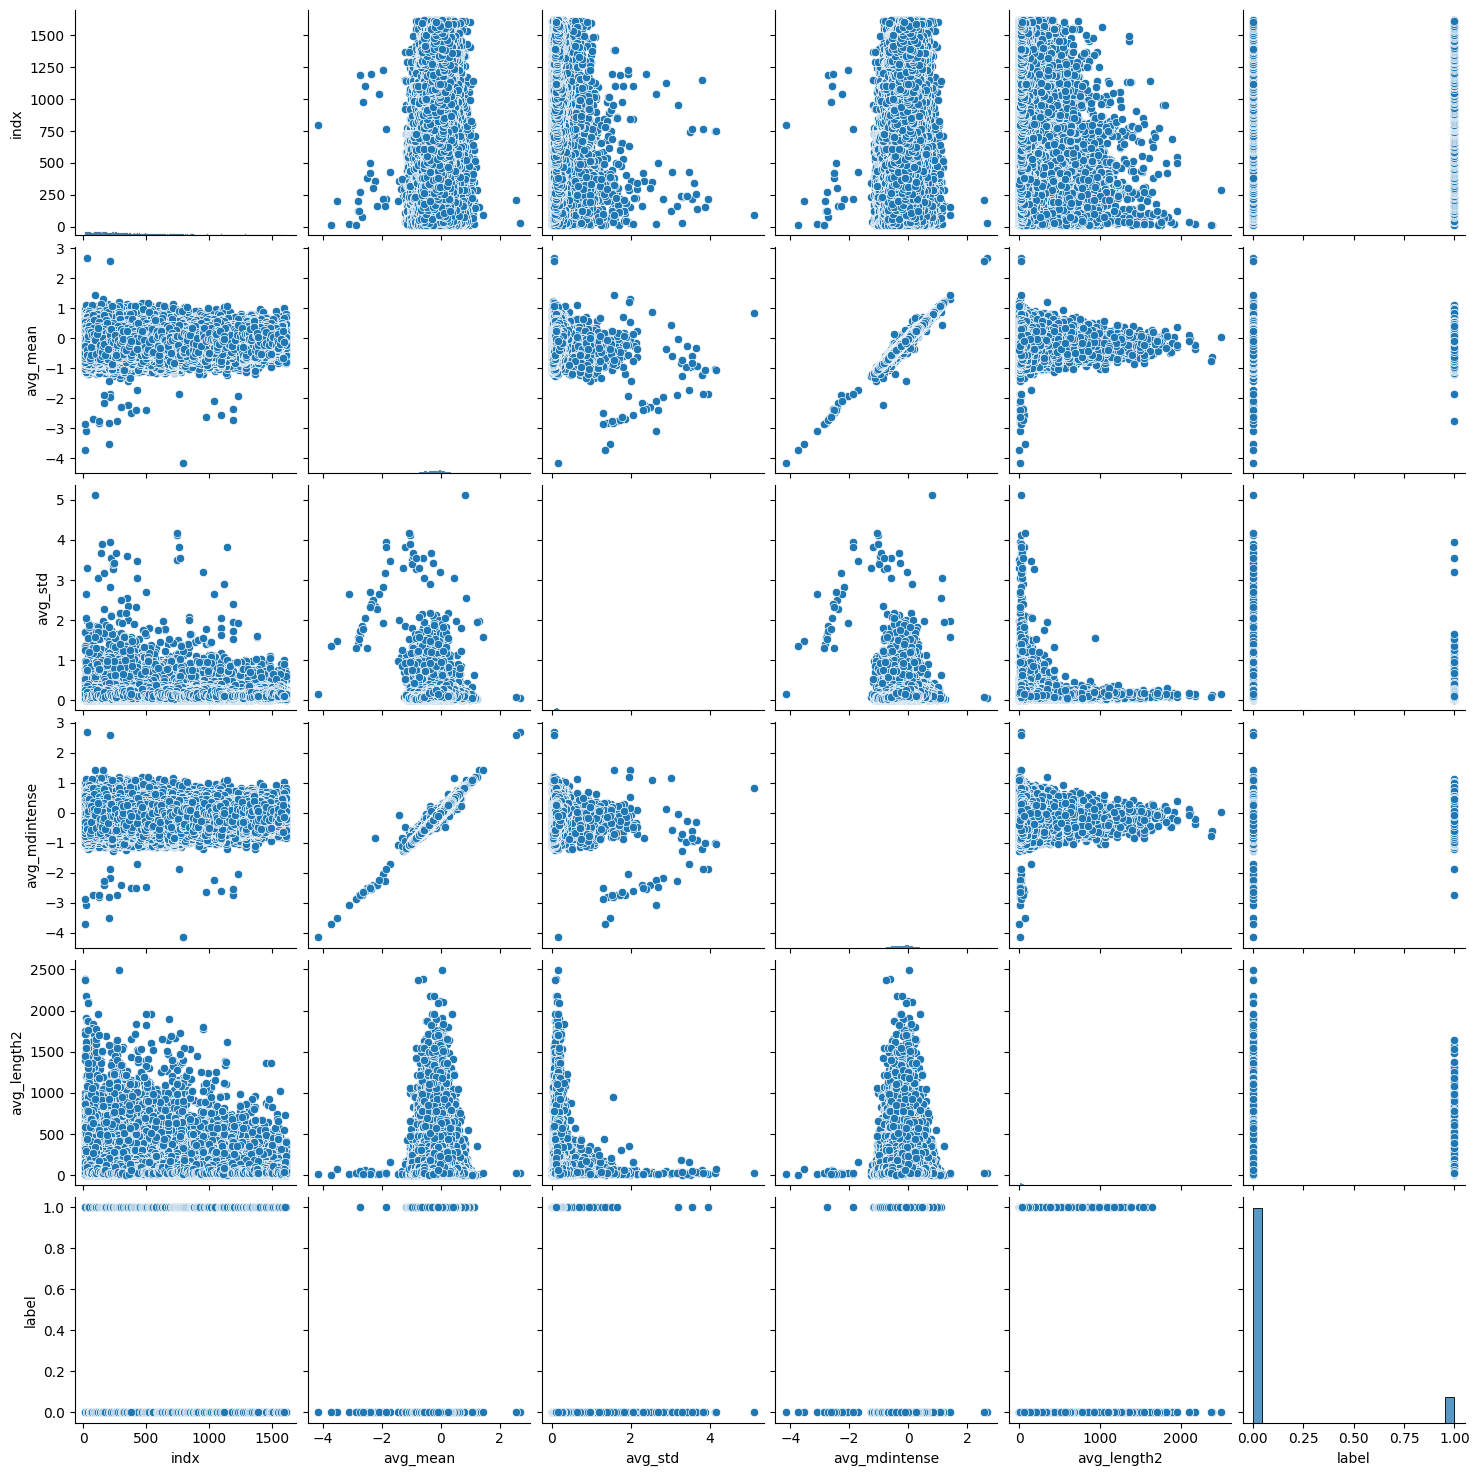

In [12]:
sns.pairplot(dataset)

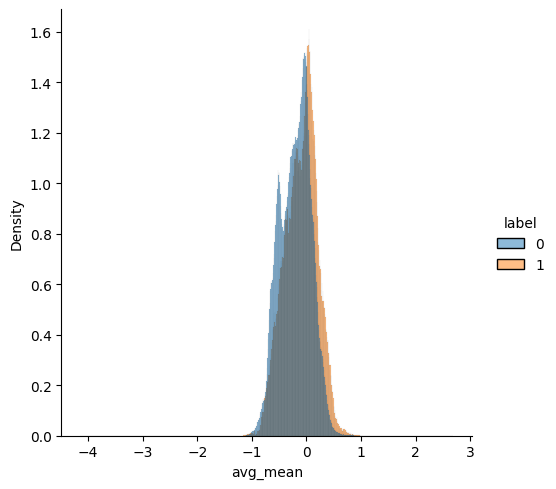

In [6]:
sns.displot(dataset, x="avg_mean", hue="label", stat="density", common_norm=False)

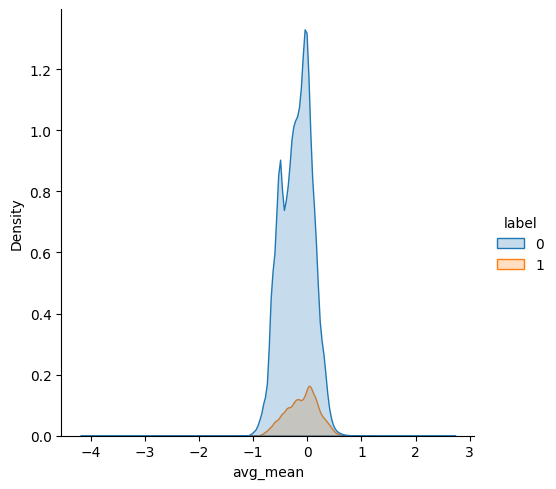

In [10]:
sns.displot(dataset, x="avg_mean", hue="label", kind="kde", fill=True)

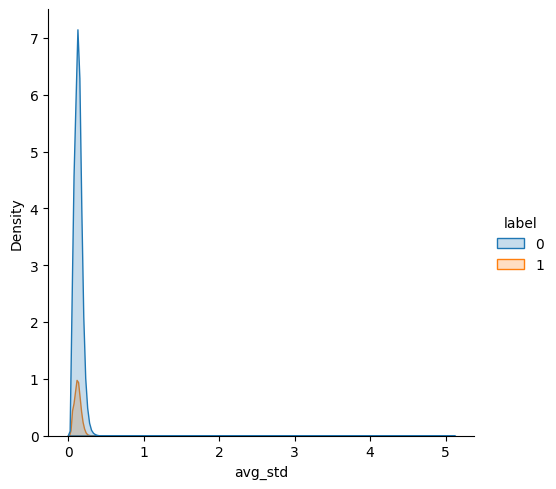

In [11]:
sns.displot(dataset, x="avg_std", hue="label", kind="kde", fill=True)

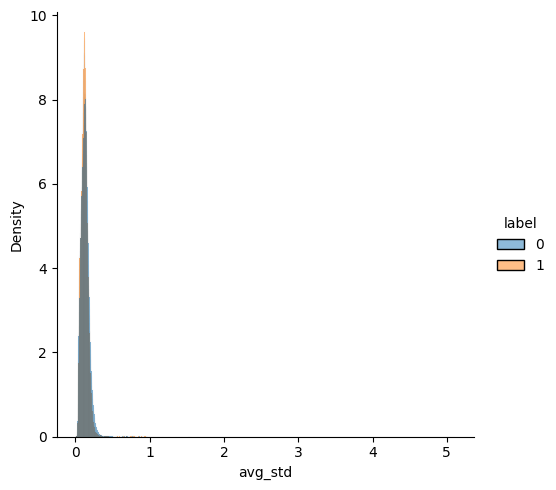

In [7]:
sns.displot(dataset, x="avg_std", hue="label", stat="density", common_norm=False)

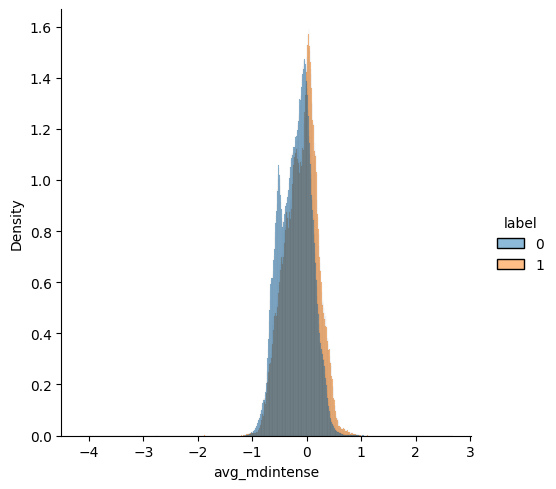

In [8]:
sns.displot(dataset, x="avg_mdintense", hue="label", stat="density", common_norm=False)

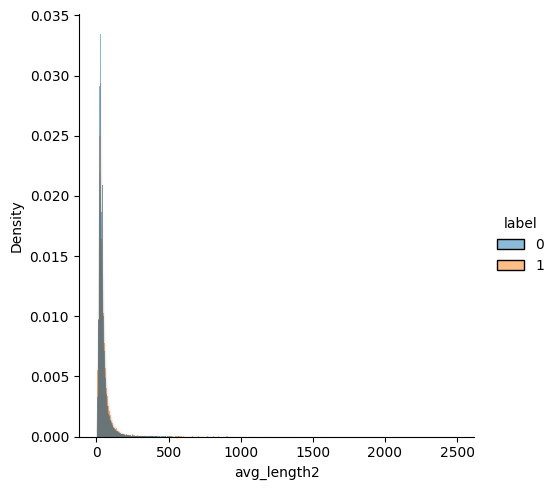

In [9]:
sns.displot(dataset, x="avg_length2", hue="label", stat="density", common_norm=False)

In [18]:
# Attempt https://thedatafrog.com/en/articles/visualizing-datasets/
labels = dataset['label']
signal_var_names = ['avg_mean','avg_std','avg_mdintense','avg_length2']
target_names = ['label_0:unmodified','label_1: modified']
print(signal_var_names)
print(np.unique(labels))
print(target_names)

['avg_mean', 'avg_std', 'avg_mdintense', 'avg_length2']
[0 1]
['label_0:unmodified', 'label_1: modified']


In [11]:
data_signal=dataset[['avg_mean','avg_std','avg_mdintense','avg_length2','label']]
data_signal


,avg_mean,avg_std,avg_mdintense,avg_length2,label
0,-0.379295,0.059457,-0.386073,18.6,1
1,-0.224518,0.079366,-0.226347,21.8,1
2,-0.027033,0.106017,-0.016552,24.2,1
3,0.135500,0.146305,0.127863,19.6,1
4,-0.297275,0.098792,-0.307865,59.0,1
...,...,...,...,...,...
1822819,0.251371,0.097341,0.250863,205.6,0
1822820,-0.242580,0.199999,-0.230983,8.0,0
1822821,-0.153419,0.253634,-0.074312,570.2,0
1822822,-0.008397,0.117552,-0.003787,137.6,0


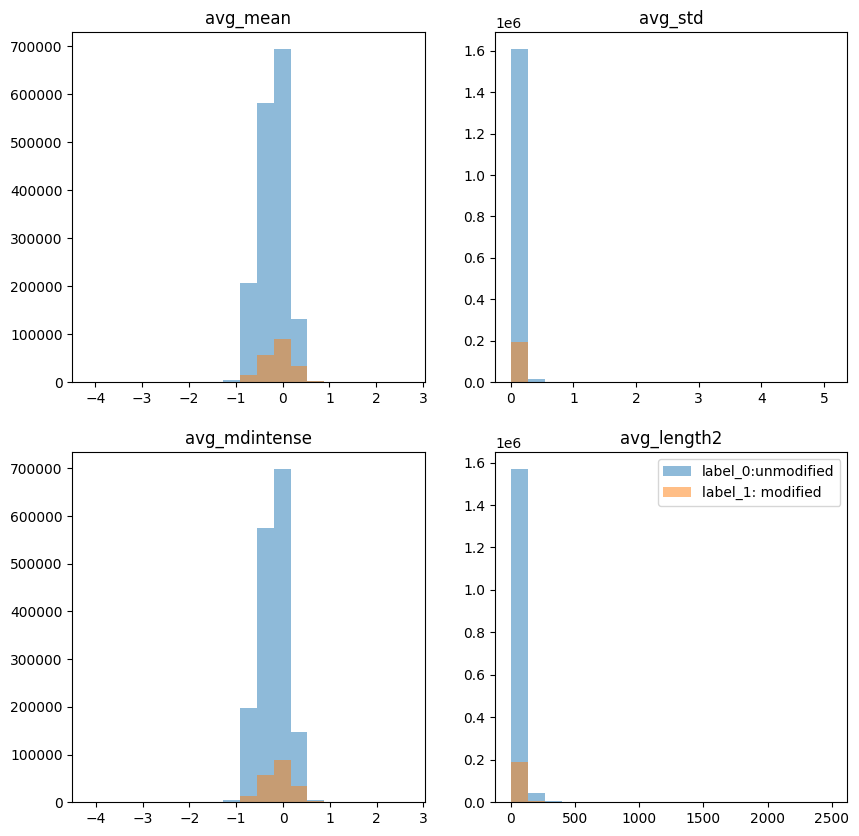

In [19]:
import matplotlib.pyplot as plt
#Pay attention to  dataframe and array: https://github.com/marcotcr/lime/issues/293
fig = plt.figure(figsize=(10,10))

# loop on variables
for i in range(4):
    # create subplot 
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data_signal.iloc[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(signal_var_names[i])
plt.legend()

In [ ]:
#import seaborn as sns
#sns.pairplot(data_signal, hue="label", palette='bright');

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data_signal)

In [22]:
view.shape

(1822824, 2)

Text(0, 0.5, 'PCA-2')

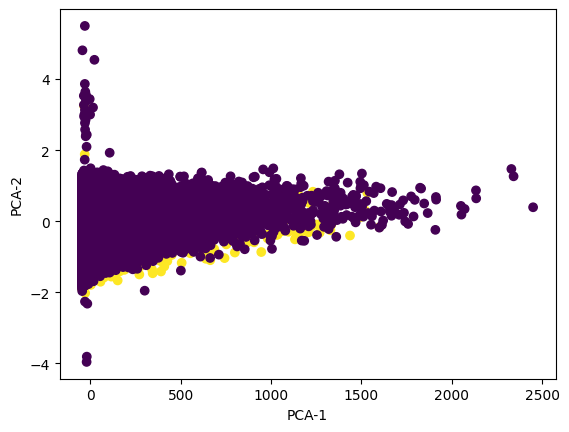

In [24]:
plt.scatter(view[:,0], view[:,1], c=labels)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
#most of the distribution remains confused, with some classes spread all over the place.

In [ ]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(data_signal)


/home/jiayi/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jiayi/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')